In [1]:
# Notebook for various CM plots for DECaLS LRG project
# Everything is messed up, yo.

# This is a Jupyter notebook with the plots I made this week while trying to figure out why my color-magnitude plots
# look all wonky. I eliminated various cuts so I could see if I still got the same results. I thought it was 
# easier this way than to just include the plots here and comment on them in an email.

# Last edited 4:12pm 21 July 2017

In [44]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack

In [45]:
# Read in data
hdulist = fits.open('http://portal.nersc.gov/project/cosmo/data/legacysurvey/dr3/external/survey-dr3-specObj-dr13.fits')
hdulist2 = fits.open('https://data.sdss.org/sas/dr13/sdss/spectro/redux/specObj-dr13.fits')
tbdata = hdulist[1].data
tbdata2 = hdulist2[1].data

# Put data in arrays

# Object ID from survey file; value -1 for non-matches
objid = []
objid = tbdata.field('OBJID') 

# Only galaxies included
gal_type = []
gal_type = tbdata.field('TYPE') 

# Don't need this because we need all sources
# What survey the data comes from
survey = []
survey = tbdata2.field('SURVEY')

# RA
ra = []
ramatch = []
ra = tbdata.field('RA')

# Dec
dec = []
decmatch = []
dec = tbdata.field('DEC')

# Galaxy class
gal_class = []
gal_class = tbdata2.field('CLASS') 

# SPECPRIMARY; set to 1 for primary observation of object, 0 otherwise
spec = []
spec = tbdata2.field('SPECPRIMARY')

# Bitmask of spectroscopic warning values; need set to 0
zwarn_noqso = []
zwarn_noqso = tbdata2.field('ZWARNING_NOQSO')

# Spectroscopic classification for certain redshift?
class_noqso = []
class_noqso = tbdata2.field('CLASS_NOQSO')

# Array for LOWZ targets
targets = []
target_match = []
targets = tbdata2.field('BOSS_TARGET1')
targetVec = np.array(targets)

# Section of code to find LOWZ targets

# Function to find LOWZ targets
def divideBy2(decNumber):
	np.vectorize(decNumber)
	remstack = Stack()
	
	if decNumber == 0: return "0"
	
	while decNumber > 0:
		rem = decNumber % 2
		remstack.push(rem)
		decNumber = decNumber // 2
		
	binString = ""
	while not remstack.isEmpty():
		binString = binString + str(remstack.pop())
			
	return binString

divideBy2Vec = np.vectorize(divideBy2)

a = divideBy2Vec(targets) # gives binary in string form
bin2int = [int(i) for i in a] # converts binary strings to integer
tar = np.array(bin2int) # puts list of integers into numpy array
c = tar % 2 # divide by two again to see if the binary number ends in zero
lowz_tar = np.array(c)

# Number of observations of source from legacy file
obs = []
obsmatch = []
obs = tbdata.field('DECAM_NOBS') 

# Put flux data in an array from legacy file
# Flux has ugrizY, so needs to be divided into 6 arrays
flux =[]
fluxmatch = []

# Flux from DECAM
flux = tbdata.field('DECAM_FLUX')

In [ ]:
# For this program, I make most of the cuts I need in DECAM_NOBS and DECAM_FLUX. Then, I only calculate magnitudes for
# sources for which I have at least three observations and the flux in the g and r > 0. What I have done below is make 
# color magnitude plots with different cuts. A lot of it was just experimentation and guessing. In general, there is 
# no significant change, which is annoying.

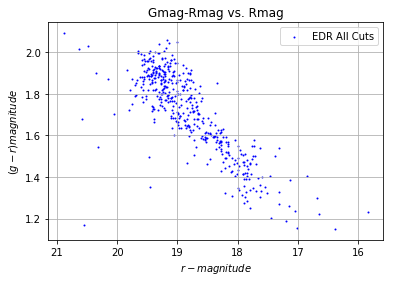

In [57]:
# Here, I make the CM plot for DECaLS EDR

obsmatch = obs[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]  

# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

fluxmatch = flux[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]  

# Divide flux arrays into 6 arrays
uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_match = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag = 22.5 - 2.5 * np.log10(gflux_match)
rmag = 22.5 - 2.5 * np.log10(rflux_match)

color = gmag - rmag

# Plot
plt.scatter(rmag, color, s = 1, color = 'blue', label = 'EDR All Cuts')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r-magnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.legend(loc='upper right')

plt.show()

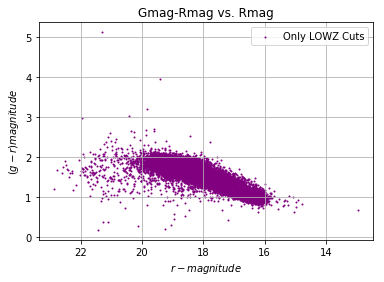

In [58]:
# Here, only the LOWZ from BOSS_TARGET1 is made.

# makes only LOWZ cut
obsmatch = obs[np.where(lowz_tar == 1)] 

# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

# only makes LOWZ cut
fluxmatch = flux[np.where(lowz_tar == 1)]

# Divide flux arrays into 6 arrays
uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_match = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag = 22.5 - 2.5 * np.log10(gflux_match)
rmag = 22.5 - 2.5 * np.log10(rflux_match)

color = gmag - rmag

# Plot
plt.scatter(rmag, color, s = 1, color = 'purple', label = 'Only LOWZ Cuts')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r-magnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.legend(loc='upper right')

plt.show()

# Still bad.

In [54]:
len(color)

32877

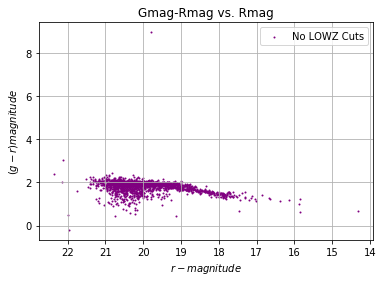

In [59]:
# Here, every cut used except LOWZ. I thought maybe the function I wrote to extract LOWZ sources was bad (and it still
# may be), so I thought I'd make every cut except the LOWZ to see if a CM plot made sense.

# makes every cut but LOWZ
obsmatch = obs[np.where((objid >-1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))] 

# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

# makes every cut but LOWZ
fluxmatch = flux[np.where((objid > -1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]  

# Divide flux arrays into 6 arrays
uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_match = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag = 22.5 - 2.5 * np.log10(gflux_match)
rmag = 22.5 - 2.5 * np.log10(rflux_match)

color = gmag - rmag

# Plot
plt.scatter(rmag, color, s = 1, color = 'purple', label = 'No LOWZ Cuts')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r-magnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.legend(loc='upper right')

plt.show()

# Slope is still a little negative, but it's actually more constant than I expected.

In [56]:
len(color)

1707

In [ ]:
# Note to self: This sample is so much smaller than the previous one because it makes all the cuts (including EDR
# ra/dec cuts). The plot before this does not make those cuts and instead plots every LOWZ LRG.

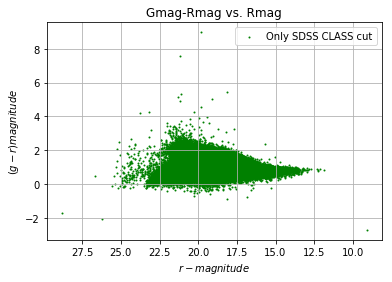

In [60]:
# Here, use only 'galaxy' cut from SDSS CLASS.
# I manged to figure out how to download SDSS Petrosian fluxes, and I made a bunch of SDSS CM plots in another Jupyter
# notebook. I wanted to compare SDSS with DECaLS, so I made a CM plot using only the objid cuts (to make sure there 
# are matches) and the 'galaxy' cut from SDSS CLASS.

# makes only CLASS cut
obsmatch = obs[np.where((objid > -1) & (gal_class == 'GALAXY'))] 

# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

# makes only CLASS cut
fluxmatch = flux[np.where((objid > -1) & (gal_class == 'GALAXY'))]  

# Divide flux arrays into 6 arrays
uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_match = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag = 22.5 - 2.5 * np.log10(gflux_match)
rmag = 22.5 - 2.5 * np.log10(rflux_match)

color = gmag - rmag

# Plot
plt.scatter(rmag, color, s = 1, color = 'green', label = 'Only SDSS CLASS cut')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r-magnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.legend(loc='upper right')

plt.show()

# This plot is confusing. I guess the general slope is negative, but again, it seems more constant than I expected.

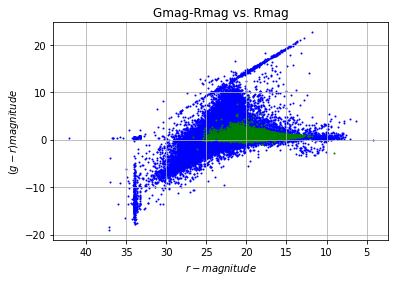

In [61]:
# I want to see how this compares with the SDSS CM plot derived from Petrosian fluxes. This is the CM plot using
# Petrosian fluxes from SDSS DR13 with the above DECaLS CM plot overlaid. 

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import csv
import numpy as np
import pandas as pd

# For gflux and rflux values of every galaxy source in SDSS
# Read in the data 

flux1 = pd.read_csv("https://raw.githubusercontent.com/metownsend/Data/master/sdss_flux.csv", sep=',', header=0)

# Assign data to a variable

gflux1 = flux1['gflux'].values
rflux1 = flux1['rflux'].values

# Calculate magnitudes and color

gmag1 = 22.5 - 2.5 * np.log10(gflux1[np.where((gflux1 > 0.) & (rflux1 > 0.))])
rmag1 = 22.5 - 2.5 * np.log10(rflux1[np.where((gflux1 > 0.) & (rflux1 > 0.))])

color1 = gmag1 - rmag1

# CM plot
# Make sure to execute cell immediately preceeding this
plt.scatter(rmag1, color1, s = 1, color = 'blue')
plt.scatter(rmag, color, s = 1, color = 'green')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r-magnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.show()

# SDSS is in the blue and DECaLS is in the green. DECaLS doesn't really get any of the SDSS galaxies under 0 on the
# color axis, and I'm not sure what that means.

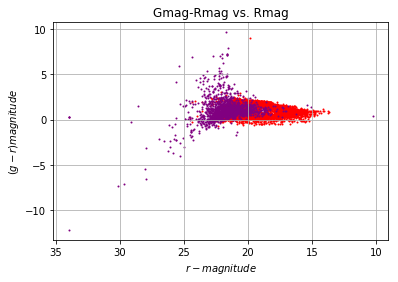

In [62]:
# Here, just SDSS CLASS cut *and* DECaLS EDR ra/dec cuts and compare with SDSS with DECaLS EDR ra/dec cuts.
# I wanted to narrow it down to just the EDR sources, so below is a CM plot of SDSS sources using Petrosian fluxes
# for only sources in the 25 square degrees of the DECaLS EDR with the DECaLS overlaid.

obsmatch = obs[np.where((objid > -1) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5))]
# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

fluxmatch = flux[np.where((objid > -1) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5))]

uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_match = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag = 22.5 - 2.5 * np.log10(gflux_match)
rmag = 22.5 - 2.5 * np.log10(rflux_match)

color = gmag - rmag

# For gflux and rflux values of every galaxy source in SDSS in the DECaLS EDR footprint
# Read in the data 

flux1 = pd.read_csv("https://raw.githubusercontent.com/metownsend/Data/master/sdss_EDR.csv", sep=',', header=0)

# Assign data to a variable

gflux1 = flux1['gflux'].values
rflux1 = flux1['rflux'].values

# Calculate magnitudes and color

gmag1 = 22.5 - 2.5 * np.log10(gflux1[np.where((gflux1 > 0.) & (rflux1 > 0.))])
rmag1 = 22.5 - 2.5 * np.log10(rflux1[np.where((gflux1 > 0.) & (rflux1 > 0.))])

color1 = gmag1 - rmag1

# Plot
plt.scatter(rmag, color, s = 1, color = 'red') # decals
plt.scatter(rmag1, color1, s = 1, color = 'purple') # sdss

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r-magnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.show()

# The red is DECaLS and the purple is SDSS. SDSS looks to be getting redder as rmag gets brighter, but there is still
# that weird clump that levels off. And that leveled out area seems to be where the DECaLS data lives.

In [29]:
print(len(color))
print(len(color1))

# Why are there so many more DECaLS objects than SDSS? I thought that objid cut was supposed to only give matches. 
# Maybe I did something wrong in the SDSS SQL search.

5802
1423


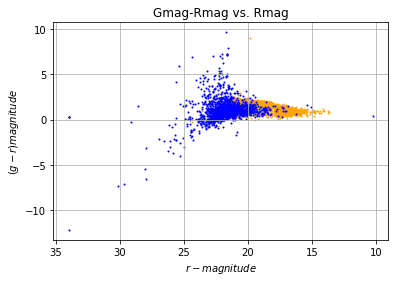

In [64]:
# Here, only DECaLS 'TYPE' cuts. For giggles I made EDR cut and DECaLS TYPE cut to compare with SDSS. 

obsmatch = obs[np.where((objid > -1) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")))]
                        
# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

# makes every cut but LOWZ
fluxmatch = flux[np.where((objid > -1) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")))] 
# Divide flux arrays into 6 arrays
uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_match = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag = 22.5 - 2.5 * np.log10(gflux_match)
rmag = 22.5 - 2.5 * np.log10(rflux_match)

color = gmag - rmag

# Plot
# plt.scatter(rmag, color, s = 1, color = 'orange', label = 'Only TYPE cuts')

# plt.gca().invert_xaxis()

# plt.grid(True)
# plt.title('Gmag-Rmag vs. Rmag')
# plt.xlabel(r'$r magnitude$')
# plt.ylabel(r'$g-r magnitude$')

# plt.legend(loc='upper right')

# plt.show()

flux1 = pd.read_csv("https://raw.githubusercontent.com/metownsend/Data/master/sdss_EDR.csv", sep=',', header=0)

# Assign data to a variable

gflux1 = flux1['gflux'].values
rflux1 = flux1['rflux'].values

# Calculate magnitudes and color

gmag1 = 22.5 - 2.5 * np.log10(gflux1[np.where((gflux1 > 0.) & (rflux1 > 0.))])
rmag1 = 22.5 - 2.5 * np.log10(rflux1[np.where((gflux1 > 0.) & (rflux1 > 0.))])

color1 = gmag1 - rmag1

# Plot
plt.scatter(rmag, color, s = 1, color = 'orange') # decals
plt.scatter(rmag1, color1, s = 1, color = 'blue') # sdss

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r-magnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.show()

# Just get something similar to the others.

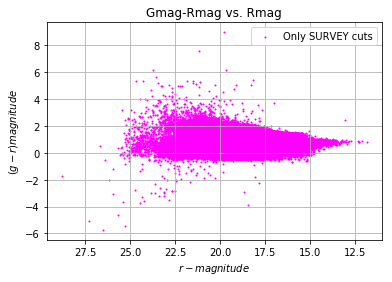

In [65]:
# Here, only use objid, and SURVEY cuts. At this point I'm just kind of running out of ideas.

obsmatch = obs[np.where((objid >-1) & ((survey == 'sdss') | (survey == 'boss')))] 

# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

# makes every cut but LOWZ
fluxmatch = flux[np.where((objid >-1) & ((survey == 'sdss') | (survey == 'boss')))] 

# Divide flux arrays into 6 arrays
uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_match = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag = 22.5 - 2.5 * np.log10(gflux_match)
rmag = 22.5 - 2.5 * np.log10(rflux_match)

color = gmag - rmag

# Plot
plt.scatter(rmag, color, s = 1, color = 'magenta', label = 'Only SURVEY cuts')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r-magnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.legend(loc='upper right')

plt.show()

# This looks really similar to the CM plot where I only used the SDSS 'galaxy' class cut, ecxept there are more below
# 0 in (g-r) color

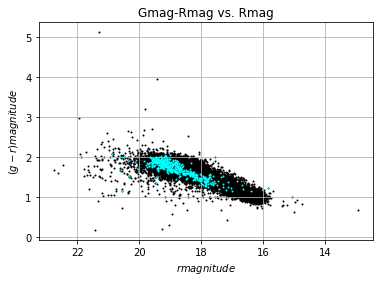

In [66]:
# CM plots for EDR and full DECaLS sample.

# EDR
obsmatch = obs[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]  

# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

fluxmatch = flux[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]  

# Divide flux arrays into 6 arrays
uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_match = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag = 22.5 - 2.5 * np.log10(gflux_match)
rmag = 22.5 - 2.5 * np.log10(rflux_match)

color = gmag - rmag

# Full DECaLS
obsmatch1 = obs[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]  

# Put number of observations per filter into arrays that match the filter
uobs1 = []
gobs1 = []
robs1 = []
iobs1 = []
zobs1 = []
yobs1 = []

b = np.array(obsmatch1)
uobs1 = b[:,0]
gobs1 = b[:,1]
robs1 = b[:,2]
iobs1 = b[:,3]
zobs1 = b[:,4]
yobs1 = b[:,5]

fluxmatch1 = flux[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]  

# Divide flux arrays into 6 arrays
uflux1 = []
gflux1 = []
rflux1 = []
iflux1 = []
zflux1 = []
yflux1 = []

a = np.array(fluxmatch1)
uflux1 = a[:,0]
gflux1 = a[:,1]
rflux1 = a[:,2]
iflux1 = a[:,3]
zflux1 = a[:,4]
yflux1 = a[:,5]

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_match1 = gflux1[np.where((gobs1 >= 3) & (robs1 >= 3) & (gflux1 > 0.) & (rflux1 > 0.))]
rflux_match1 = rflux1[np.where((gobs1 >= 3) & (robs1 >= 3) & (rflux1 > 0.) & (gflux1 > 0.))]

# Calculate gmag, rmag, and (g-r) color
gmag1 = 22.5 - 2.5 * np.log10(gflux_match1)
rmag1 = 22.5 - 2.5 * np.log10(rflux_match1)

color1 = gmag1 - rmag1

# Plot
plt.scatter(rmag1, color1, s = 1, color = 'black') # all DECaLS LRGs
plt.scatter(rmag, color, s = 1, color = 'cyan') # EDR LRGs

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$rmagnitude$')
plt.ylabel(r'$(g-r) magnitude$')

plt.show()

# This probably should have gone at the beginning, but oh well. This is a CM plot of all DECaLS LRGs (black) and only
# EDR LRGs (cyan). As you've pointed out, it doesn't make sense.